In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Necessary python package 

import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import pos_tag, word_tokenize, wordpunct_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud




In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
#Read train and test dataset in csv file from our google shared drive

traindf = pd.read_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19_train_data_three.csv')
testdf = pd.read_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19_test_data_three.csv')

In [5]:
traindf

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
3,"574 Covid-19 patients recovered, confirmed the...",HAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
...,...,...
4292,The freezer and the drain pipe https://t.co/gx...,SPAM
4293,@MatAshimolowo Someone should please help me w...,SPAM
4294,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
4295,Covid-19 really made everyone lose a year of t...,SPAM


In [6]:
testdf

,text,class_label
0,Weed is the cure for Covid 19\n\nMe: https://t...,SPAM
1,You can now select your second preference of a...,SPAM
2,Arrests at Copenhagen anti-lockdown demonstrat...,SPAM
3,OnlineKhabar: Nepal Covid-19 tally: 78 new cas...,HAM
4,.@PriyankaPulla has an in-depth report on why ...,SPAM
...,...,...
795,"Good morning to everyone, except COVID-19. I b...",SPAM
796,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
797,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...,SPAM
798,The PANCAP Toolkit for social contracting will...,SPAM


In [7]:
traindf_ham = traindf.loc[traindf['class_label'] == 'HAM']
traindf_ham

,text,class_label
3,"574 Covid-19 patients recovered, confirmed the...",HAM
10,"DZRH SPECIAL COVERAGE | Arrival of 600,000 dos...",HAM
22,@BBCPolitics @BBCNews WORLD. \n\nCOVID-19 D...,HAM
25,Philippines receives COVID-19 vaccine after de...,HAM
28,COVID-19 cases and deaths in health care worke...,HAM
...,...,...
4249,"Iran’s COVID-19 fatalities pass 60,000 https:/...",HAM
4251,Johnson &amp; Johnson’s single-shot Janssen CO...,HAM
4281,Exclusive News: COVID-19 Vaccine: Pay Rs 250 P...,HAM
4285,"COVID-19 vaccines arrive Nigeria Monday, Says ...",HAM


In [8]:
traindf_spam = traindf.loc[traindf['class_label'] == 'SPAM']
traindf_spam

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
5,With the private sector joining the Covid-19 i...,SPAM
...,...,...
4292,The freezer and the drain pipe https://t.co/gx...,SPAM
4293,@MatAshimolowo Someone should please help me w...,SPAM
4294,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
4295,Covid-19 really made everyone lose a year of t...,SPAM


In [9]:
#Read train and test dataset in csv file from our google shared drive (spam and ham separately)

traindf_ham.to_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19-train-data_ham_three.csv')
traindf_spam.to_csv('/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/covid19-train-data_spam_three.csv')

In [10]:
#count the number of spam and ham separately.

#Counting number
print('---------Counting number---------')
traindf['class_label'].value_counts()



---------Counting number---------


SPAM    3800
HAM      497
Name: class_label, dtype: int64

In [11]:
#Probability  Ratio
print('---------Probability  Ratio---------')
traindf['class_label'].value_counts(normalize=True)

---------Probability  Ratio---------


SPAM    0.884338
HAM     0.115662
Name: class_label, dtype: float64

In [12]:
#combine train and test dataset
combine_frame = pd.concat([traindf,testdf], ignore_index=True)

In [13]:
combine_frame

,text,class_label
0,Recent #graduates: how has covid-19 impacted y...,SPAM
1,@rednym Those folks are unrepentantly corrupt....,SPAM
2,Outbreak reported at Peterborough student resi...,SPAM
3,"574 Covid-19 patients recovered, confirmed the...",HAM
4,@wardtours @scottjlawson @Motughosh as Eircode...,SPAM
...,...,...
5092,"Good morning to everyone, except COVID-19. I b...",SPAM
5093,Great decision by PM @JustinTrudeau\n &amp; F...,SPAM
5094,#Iraq #Covid_19 #PopeFrancisInIraq @Pontifex\n...,SPAM
5095,The PANCAP Toolkit for social contracting will...,SPAM


In [14]:
combine_frame['class_label'] = [1 if c=='SPAM' else 0 for c in combine_frame.class_label]

combine_frame['class_label'].value_counts()

1    4463
0     634
Name: class_label, dtype: int64

In [16]:
#resample datasets
from sklearn.utils import resample
df_majority = combine_frame[combine_frame.class_label == 1]
df_minority = combine_frame[combine_frame.class_label == 0]

#Upsample minority class
df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=4463,
                                   random_state=123)

#Combine majority class with upsampled minorirty class
combine_frame_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Display new class counts
combine_frame_upsampled.class_label.value_counts()

1    4463
0    4463
Name: class_label, dtype: int64

In [17]:
combine_frame_upsampled.to_csv("/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/resample/resample_dataset_three.csv")

In [18]:
#clean tweets that have have links and emogi
combine_frame_upsampled['text_cl'] = combine_frame_upsampled['text'].apply(lambda x: re.split('https:\/\/.*|[^\x00-\x7F]', str(x))[0])
clean_links = pd.DataFrame(data=combine_frame_upsampled['text_cl'],
                           columns=["text_cl"])

clean_links

,text_cl
0,Recent #graduates: how has covid-19 impacted y...
1,@rednym Those folks are unrepentantly corrupt....
2,Outbreak reported at Peterborough student resi...
4,@wardtours @scottjlawson @Motughosh as Eircode...
5,With the private sector joining the Covid-19 i...
...,...
4666,"574 Covid-19 patients recovered, confirmed the..."
3301,Johnson &amp; Johnson
829,FDA aprueba la vacuna de JJ.\n\nFDA Issues Eme...
4591,"341 New COVID-19 Cases, 712 Discharged And 3 D..."


In [19]:
#Change tweets to be lower_case at all
text_lower_case = clean_links['text_cl'].str.lower()

text_lower_case

0       recent #graduates: how has covid-19 impacted y...
1       @rednym those folks are unrepentantly corrupt....
2       outbreak reported at peterborough student resi...
4       @wardtours @scottjlawson @motughosh as eircode...
5       with the private sector joining the covid-19 i...
                              ...                        
4666    574 covid-19 patients recovered, confirmed the...
3301                                johnson &amp; johnson
829     fda aprueba la vacuna de jj.\n\nfda issues eme...
4591    341 new covid-19 cases, 712 discharged and 3 d...
996     the philippines received on sunday its first b...
Name: text_cl, Length: 8926, dtype: object

In [20]:
#make corpus
corpus = text_lower_case.to_list()
corpus

['recent #graduates: how has covid-19 impacted your career after leaving @edinuni ? take part in this short survey to let us know what support you need #haveyoursay ',
 '@rednym those folks are unrepentantly corrupt. by now i was thinking we',
 'outbreak reported at peterborough student residence ',
 '@wardtours @scottjlawson @motughosh as eircode cannot be used for sorting many courier companies have not integrated it. they therefore leave it up to drivers to decide if they will get/use it themselves. this option allows them continue use addressing as an excuse for poor service!\n',
 'with the private sector joining the covid-19 inoculation drive from march 1, forbes india deconstructs the immunisation plan to find out if will help speed up the current laggard pace @divyajshekhar &amp; @mbalachandran88 ',
 '@genekahn there is no covid-19.\n\n',
 'answers to frequently asked questions on covid-19 vaccines ',
 '',
 'gopq senate opposed biden\'s plan to recuse economy, covid-19 crisis &a

In [21]:
#make word martrix for tagging only noun word.
word_matrix = []
for text in corpus:
  tknzr = TweetTokenizer(strip_handles=True)
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  stem_words = stemmer.stem(text)
  lemma_words = lemmatizer.lemmatize(stem_words)
  sentence = tknzr.tokenize(lemma_words)
  sent = pos_tag(sentence)
  sent_clean = [word for (word, pos) in sent if(pos == 'NN' or pos == 'NNPS')]
  corpus2 = ' '.join(sent_clean)
  word_matrix.append(corpus2)

In [22]:
word_matrix

['career part survey support',
 'i w',
 'outbreak student residence',
 'eircode cannot courier use option excuse service',
 'sector covid inoculation drive march immunisation plan laggard pace',
 '',
 '',
 '',
 "gopq senate biden's plan economy crisis yrs governance kickback form poverty class bbb",
 'god girl home',
 'bus security',
 'fast pre-register covid vaccine',
 'program / article bill covid relief bill nothing please explain thank',
 'york covid',
 'morning pnp luna re curfew implementation health relation number infection place luna quezon',
 '#goptrumptaxscam cost relief package relief package need tax sham',
 'anyone coding conference science',
 'vaccine passport app work',
 'i share california work',
 'region crisis famine shortage water side covid fgs jls emergency response region',
 'state hospital icu capacity',
 'oxford study ireland country europe covid w',
 'japan vaccine supply april kono',
 'cpp vaccine news weekend',
 'ema review celltrion antibody regdanvimab age

In [23]:
#Bag of Words (BoW) Term Frequency
#Bag of Words (BoW) Term Frequency captures frequency of term in document. 
#Under TfidfVectorizer, we set binary parameter equal to false 
#so that it can show the actual frequency of the term and norm parameter 
#equal to none.
from sklearn.feature_extraction.text import TfidfVectorizer

tfvec_text = TfidfVectorizer(input=word_matrix, stop_words = 'english' , norm="l2",
                             lowercase=True,min_df=1, max_df=1.0,max_features=None,ngram_range=(1,1))

text_n =  pd.DataFrame(tfvec_text.fit_transform(word_matrix).toarray(), columns=tfvec_text.get_feature_names())



In [24]:
text_n

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xi,xiao,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
text_n.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/TFIDF/covid19__tf_idf_three_resampled.csv', encoding='utf-8-sig', index=False)


In [26]:
combine_frame_upsampled['class_label']

0       1
1       1
2       1
4       1
5       1
       ..
4666    0
3301    0
829     0
4591    0
996     0
Name: class_label, Length: 8926, dtype: int64

In [27]:
#split the dataset to train and test
from sklearn.model_selection import train_test_split

#30% for test, 70% train split
X_train , X_test, y_train, y_test = train_test_split(text_n, combine_frame_upsampled['class_label'], test_size=0.3, random_state=0)

print('rows in test set: '+ str(X_test.shape))
print('rows in train set: '+ str(X_train.shape))

print('rows in y_test set: '+ str(y_test.shape))
print('rows in y_train set: '+ str(y_train.shape))


rows in test set: (2678, 4433)
rows in train set: (6248, 4433)
rows in y_test set: (2678,)
rows in y_train set: (6248,)


In [28]:
X_train

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xi,xiao,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
3944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.692817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182459,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#cross - validation function
n_folds = 10
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def score_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  score = cross_val_score(model, X_train.values, y_train, scoring="accuracy",cv=kf)
  print(score)
  return(score)


In [ ]:
#naive_bayes models
from sklearn.naive_bayes import MultinomialNB

#train a naive classifier
naive = MultinomialNB()
naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Cross-Validation score of naive model
score = score_cv(naive)
print("naive score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.864      0.8656     0.8736     0.8608     0.8688     0.8704
 0.8704     0.8544     0.86698718 0.84455128]
naive score: 0.8640 (S.D: 0.0083) 


In [ ]:
#review the naive classifier accuracy (Test)
print("\n naive accuracy: {:.4f}".format(naive.score(X_test,y_test)))


 naive accuracy: 0.8745


In [ ]:
#review the naive classifier accuracy (Train)
print("\n naive accuracy (Train-set): {:.4f}".format(naive.score(X_train,y_train)))


 naive accuracy (Train-set): 0.9088


In [30]:
#Logistic Regression models
from sklearn.linear_model import LogisticRegression

#train a logistic classifier 
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#Cross-Validation score of logistic model

score = score_cv(logistic)
print("logistic score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.8992     0.912      0.9312     0.9024     0.9216     0.9072
 0.9024     0.8976     0.91826923 0.90224359]
logistic score: 0.9094 (S.D: 0.0105) 


In [32]:
#review the logistic classifier accuracy (Test)
print("\n logistic accuracy: {:.4f}".format(logistic.score(X_test,y_test)))


 logistic accuracy: 0.9212


In [33]:
#review the logistic classifier accuracy (Train)
print("\n logistic accuracy (Train-set): {:.4f}".format(logistic.score(X_train,y_train)))


 logistic accuracy (Train-set): 0.9281


In [ ]:
#SVC model (SVM)
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
#Cross-Validation score of SVC model

score = score_cv(svc)
print("C-Support Vector score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.8496     0.8576     0.8448     0.824      0.8512     0.8528
 0.864      0.8304     0.83814103 0.84294872]
C-Support Vector score: 0.8455 (S.D: 0.0116) 


In [ ]:
#review the SVC classifier accuracy (Test)
print("\n C-Support Vector accuracy: {:.4f}".format(svc.score(X_test,y_test)))


 C-Support Vector accuracy: 0.8499


In [ ]:
#review the SVC classifier accuracy (Train)
print("\n C-Support Vector accuracy: {:.4f}".format(svc.score(X_train,y_train)))


 C-Support Vector accuracy: 0.9075


In [ ]:
#Adaboost model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
#Cross-Validation score of Ada model

score = score_cv(ada)
print("Ada Vector score: {:.4f} (S.D: {:.4f}) ".format(score.mean(), score.std()))

[0.8336     0.8592     0.8624     0.8528     0.8512     0.8624
 0.856      0.832      0.87019231 0.84935897]
Ada Vector score: 0.8529 (S.D: 0.0116) 


In [ ]:
#review the Ada classifier accuracy (Test)
print("\n Ada accuracy: {:.4f}".format(ada.score(X_test,y_test)))


 Ada accuracy: 0.8529


In [ ]:
#review the Ada classifier accuracy (Train)
print("\n Ada accuracy: {:.4f}".format(ada.score(X_train,y_train)))


 Ada accuracy: 0.8736


In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
#classification report (naive-test)

labels = naive.predict(X_test)
actual = y_test.to_list()
predicted = labels 
result = confusion_matrix(actual, predicted)

print('Confusion Matrix (Naive-Test) :')
print(result)
print('Accuracy Score :', accuracy_score(actual,predicted))
print('Report :')
print(classification_report(actual, predicted))

score_2 = f1_score(actual, predicted, average='binary')
print('F-measure: {:.4f}'.format(score_2))

Confusion Matrix (Naive-Test) :
[[1295   64]
 [ 272 1047]]
Accuracy Score : 0.8745332337565347
Report :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1359
           1       0.94      0.79      0.86      1319

    accuracy                           0.87      2678
   macro avg       0.88      0.87      0.87      2678
weighted avg       0.88      0.87      0.87      2678

F-measure: 0.8617


In [ ]:
#classification report (naive-train)

t_labels = naive.predict(X_train)

t_actual = y_train.to_list()
t_predicted = t_labels 
t_result = confusion_matrix(t_actual, t_predicted)

print('Confusion Matrix (Naive-Train) :')
print(t_result)
print('Accuracy Score :', accuracy_score(t_actual,t_predicted))
print('Report :')
print(classification_report(t_actual, t_predicted))

t_score_2 = f1_score(t_actual, t_predicted, average='binary')
print('F-measure: {:.4f}'.format(t_score_2))

Confusion Matrix (Naive-Train) :
[[2939  165]
 [ 405 2739]]
Accuracy Score : 0.9087708066581306
Report :
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3104
           1       0.94      0.87      0.91      3144

    accuracy                           0.91      6248
   macro avg       0.91      0.91      0.91      6248
weighted avg       0.91      0.91      0.91      6248

F-measure: 0.9058


In [35]:
#classification report (logistic-test)

labels_logi = logistic.predict(X_test)

actual_logi = y_test.to_list()
predicted_logi = labels_logi 
result_logi = confusion_matrix(actual_logi, predicted_logi)

print('Confusion Matrix (Logistic-Test) :')
print(result_logi)
print('Accuracy Score :', accuracy_score(actual_logi,predicted_logi))
print('Report :')
print(classification_report(actual_logi, predicted_logi))

score_2_logi = f1_score(actual_logi, predicted_logi, average='binary')
print('F-measure: {:.4f}'.format(score_2_logi))

Confusion Matrix (Logistic-Test) :
[[1276   83]
 [ 128 1191]]
Accuracy Score : 0.921209858103062
Report :
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1359
           1       0.93      0.90      0.92      1319

    accuracy                           0.92      2678
   macro avg       0.92      0.92      0.92      2678
weighted avg       0.92      0.92      0.92      2678

F-measure: 0.9186


In [42]:
#classification report (logistic-train)
t_labels_logi = logistic.predict(X_train)

t_actual_logi = y_train.to_list()
t_predicted_logi = t_labels_logi 
t_result_logi = confusion_matrix(t_actual_logi, t_predicted_logi)

print('Confusion Matrix (Logistic-Train) :')
print(t_result_logi)
print('Accuracy Score :', accuracy_score(t_actual_logi,t_predicted_logi))
print('Report :')
print(classification_report(t_actual_logi, t_predicted_logi))

t_score_2_logi = f1_score(t_actual_logi, t_predicted_logi, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_logi))

Confusion Matrix (Logistic-Train) :
[[2913  191]
 [ 258 2886]]
Accuracy Score : 0.9281370038412292
Report :
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3104
           1       0.94      0.92      0.93      3144

    accuracy                           0.93      6248
   macro avg       0.93      0.93      0.93      6248
weighted avg       0.93      0.93      0.93      6248

F-measure: 0.9278


In [ ]:
#classification report (SVC-test)

labels_svc = svc.predict(X_test)

actual_svc = y_test.to_list()
predicted_svc = labels_svc 
result_svc = confusion_matrix(actual_svc, predicted_svc)

print('Confusion Matrix (SVC-Test) :')
print(result_svc)
print('Accuracy Score :', accuracy_score(actual_svc,predicted_svc))
print('Report :')
print(classification_report(actual_svc, predicted_svc))

score_2_svc = f1_score(actual_svc, predicted_svc, average='binary')
print('F-measure: {:.4f}'.format(score_2_svc))

Confusion Matrix (SVC-Test) :
[[1342   17]
 [ 385  934]]
Accuracy Score : 0.8498879761015683
Report :
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1359
           1       0.98      0.71      0.82      1319

    accuracy                           0.85      2678
   macro avg       0.88      0.85      0.85      2678
weighted avg       0.88      0.85      0.85      2678

F-measure: 0.8229


In [ ]:
#classification report (SVC-train)
t_labels_svc = svc.predict(X_train)

t_actual_svc = y_train.to_list()
t_predicted_svc = t_labels_svc 
t_result_svc = confusion_matrix(t_actual_svc, t_predicted_svc)

print('Confusion Matrix (SVC-Train) :')
print(t_result_svc)
print('Accuracy Score :', accuracy_score(t_actual_svc,t_predicted_svc))
print('Report :')
print(classification_report(t_actual_svc, t_predicted_svc))

t_score_2_svc = f1_score(t_actual_svc, t_predicted_svc, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_svc))

Confusion Matrix (SVC-Train) :
[[3096    8]
 [ 570 2574]]
Accuracy Score : 0.9074903969270166
Report :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3104
           1       1.00      0.82      0.90      3144

    accuracy                           0.91      6248
   macro avg       0.92      0.91      0.91      6248
weighted avg       0.92      0.91      0.91      6248

F-measure: 0.8991


In [ ]:
#classification report (Ada-test)

labels_ada = ada.predict(X_test)

actual_ada = y_test.to_list()
predicted_ada = labels_ada 
result_ada = confusion_matrix(actual_ada, predicted_ada)

print('Confusion Matrix (Ada-Test) :')
print(result_ada)
print('Accuracy Score :', accuracy_score(actual_ada,predicted_ada))
print('Report :')
print(classification_report(actual_ada, predicted_ada))

score_2_ada = f1_score(actual_ada, predicted_ada, average='binary')
print('F-measure: {:.4f}'.format(score_2_ada))

Confusion Matrix (Ada-Test) :
[[1157  202]
 [ 192 1127]]
Accuracy Score : 0.8528752800597461
Report :
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1359
           1       0.85      0.85      0.85      1319

    accuracy                           0.85      2678
   macro avg       0.85      0.85      0.85      2678
weighted avg       0.85      0.85      0.85      2678

F-measure: 0.8512


In [ ]:
#classification report (Ada-train)
t_labels_ada = ada.predict(X_train)

t_actual_ada = y_train.to_list()
t_predicted_ada = t_labels_ada 
t_result_ada = confusion_matrix(t_actual_ada, t_predicted_ada)

print('Confusion Matrix (Ada-Train) :')
print(t_result_ada)
print('Accuracy Score :', accuracy_score(t_actual_ada,t_predicted_ada))
print('Report :')
print(classification_report(t_actual_ada, t_predicted_ada))

t_score_2_ada = f1_score(t_actual_ada, t_predicted_ada, average='binary')
print('F-measure: {:.4f}'.format(t_score_2_ada))

Confusion Matrix (Ada-Train) :
[[2689  415]
 [ 375 2769]]
Accuracy Score : 0.8735595390524968
Report :
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3104
           1       0.87      0.88      0.88      3144

    accuracy                           0.87      6248
   macro avg       0.87      0.87      0.87      6248
weighted avg       0.87      0.87      0.87      6248

F-measure: 0.8752


In [38]:
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'confusion matrix (Naive-Test)')

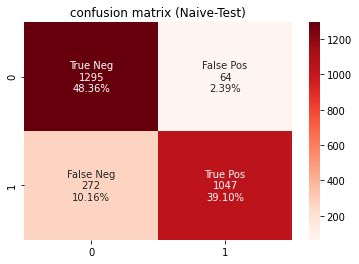

In [ ]:
#heatmap for confusion matrix (Naive-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result.flatten()/np.sum(result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt='', cmap='Reds').set_title("confusion matrix (Naive-Test)")

Text(0.5, 1.0, 'confusion matrix (Naive-Train)')

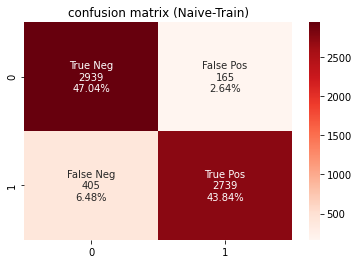

In [ ]:
#heatmap for confusion matrix (Naive-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result.flatten()/np.sum(t_result)]
t_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(2,2)
sns.heatmap(t_result, annot=t_labels, fmt='', cmap='Reds').set_title("confusion matrix (Naive-Train)")

Text(0.5, 1.0, 'confusion matrix (logistic-Test)')

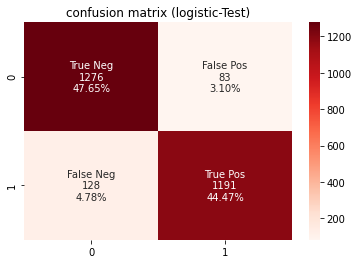

In [43]:
#heatmap for confusion matrix (logistic-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_logi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_logi.flatten()/np.sum(result_logi)]
labels_logi = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_logi = np.asarray(labels_logi).reshape(2,2)
sns.heatmap(result_logi, annot=labels_logi, fmt='', cmap='Reds').set_title("confusion matrix (logistic-Test)")

Text(0.5, 1.0, 'confusion matrix (logistic-Train)')

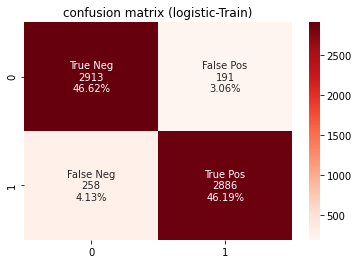

In [44]:
#heatmap for confusion matrix (logistic-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_logi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_logi.flatten()/np.sum(t_result_logi)]
t_labels_logi = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_logi = np.asarray(t_labels_logi).reshape(2,2)
sns.heatmap(t_result_logi, annot=t_labels_logi, fmt='', cmap='Reds').set_title("confusion matrix (logistic-Train)")

Text(0.5, 1.0, 'confusion matrix (SVC-Test)')

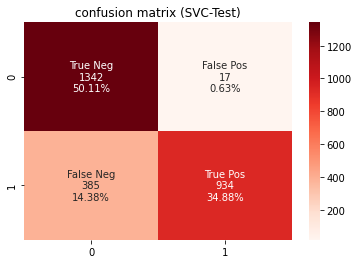

In [ ]:
#heatmap for confusion matrix (SVC-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_svc.flatten()/np.sum(result_svc)]
labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_svc = np.asarray(labels_svc).reshape(2,2)
sns.heatmap(result_svc, annot=labels_svc, fmt='', cmap='Reds').set_title("confusion matrix (SVC-Test)")

Text(0.5, 1.0, 'confusion matrix (SVC-Train)')

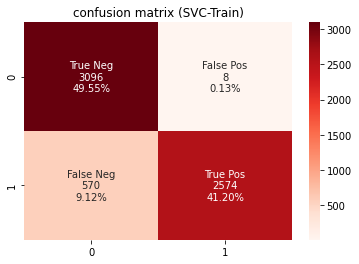

In [ ]:
#heatmap for confusion matrix (SVC-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_svc.flatten()/np.sum(t_result_svc)]
t_labels_svc = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_svc = np.asarray(t_labels_svc).reshape(2,2)
sns.heatmap(t_result_svc, annot=t_labels_svc, fmt='', cmap='Reds').set_title("confusion matrix (SVC-Train)")

Text(0.5, 1.0, 'confusion matrix (Ada-Test)')

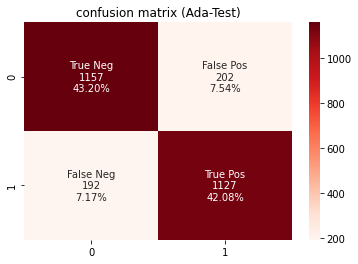

In [ ]:
#heatmap for confusion matrix (Ada-Test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               result_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     result_ada.flatten()/np.sum(result_ada)]
labels_ada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels_ada = np.asarray(labels_ada).reshape(2,2)
sns.heatmap(result_ada, annot=labels_ada, fmt='', cmap='Reds').set_title("confusion matrix (Ada-Test)")

Text(0.5, 1.0, 'confusion matrix (Ada-Test)')

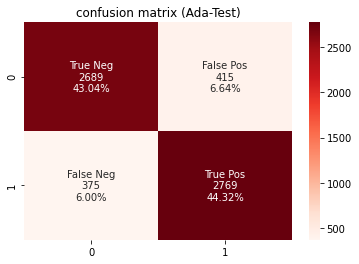

In [ ]:
#heatmap for confusion matrix (Ada-Train)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts =["{0:0.0f}".format(value) for value in 
               t_result_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in 
                     t_result_ada.flatten()/np.sum(t_result_ada)]
t_labels_ada = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
t_labels_ada = np.asarray(t_labels_ada).reshape(2,2)
sns.heatmap(t_result_ada, annot=t_labels_ada, fmt='', cmap='Reds').set_title("confusion matrix (Ada-Test)")

In [ ]:
predicted

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
X_test

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xi,xiao,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
7238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

,039,079,11,12,130,19,20,20email,20latest,20request,20update_13022021,20vaccination,220,28feb,2trillion,34,37,4313355,435,49,514,587,7832,84,976,_19,aabhi,aaj,aarogya,aaron,aarp,ab,abc,abdala,aber,aberration,abiding,abigail,abortion,abracadabra,...,xi,xiao,xiaozhan,ya,yahoo,yall,yassin,ydp,yeah,year,yechury,yehi,yep,yesterday,yolo,york,yorker,yorkshire,yorkshirelive,youth,youtube,ypa,yr,yrs,yup,yuval,ze,zealand,zei,zeman,zeneca,zero,zerocovid,zeropathy,zhan,zimbabwe,zinc,zoo,zoom,zuckerberg
3944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.692817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182459,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

4491    0
5009    0
1611    1
1284    0
4666    0
       ..
4421    0
4145    0
249     1
1033    0
4682    1
Name: class_label, Length: 2678, dtype: int64

In [ ]:
X1_train , X1_test, y1_train, y1_test = train_test_split(combine_frame_upsampled["text"], combine_frame_upsampled['class_label'], test_size=0.3, random_state=0)


In [ ]:
X1_train

4473    “This was, by the way, one of the challenges,”...
2918    Cambodia Covid-19 outbreak sparks anti-Chinese...
4135    Can't Touch This - COVID-19 Edition\nhttps://t...
2329    The #COVID19 vaccine developed and produced by...
409     Covid-19 testing kits involve either nasal or ...
                              ...                        
4992    Well said dear, I think people needs education...
2025    Telangana’s 2nd phase of COVID-19 vaccination ...
4421    Covid-19 Deaths and Cases Rapidly Decline in N...
3679    @CelebrityBarMan I salute you Chief Priest, 10...
3078    #CNN @MSNBC #FoxNews As you report on Trump to...
Name: text, Length: 6248, dtype: object

In [ ]:
X1_test

4491    The U.S. is getting a third vaccine to prevent...
5009    *U.S. authorizes J&amp;J's COVID-19 vaccine, m...
1611    Opinion | @HayesBrown: There may be no creatur...
1284    Spain: Another 9 Care Home Residents Dead And ...
4666    574 Covid-19 patients recovered, confirmed the...
                              ...                        
4421    Covid-19 Deaths and Cases Rapidly Decline in N...
4145    Vaccine success: Oxford jab 'reduces serious i...
249     President Biden's Day 39\n\nFDA authorization ...
1033    The Philippines has received 600,000 vaccine d...
4682    So that’s alright then, anyone who comes here ...
Name: text, Length: 2678, dtype: object

In [ ]:
#---------------- Naive-Test-------------------
predicted_d = {'text': X1_test, 'class-label':y_test,'predicted': predicted }
predicted_df = pd.DataFrame(data=predicted_d)

predicted_df['class-label'] = predicted_df['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df['predicted'] = predicted_df['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df

,text,class-label,predicted
4491,The U.S. is getting a third vaccine to prevent...,HAM,HAM
5009,"*U.S. authorizes J&amp;J's COVID-19 vaccine, m...",HAM,HAM
1611,Opinion | @HayesBrown: There may be no creatur...,SPAM,SPAM
1284,Spain: Another 9 Care Home Residents Dead And ...,HAM,HAM
4666,"574 Covid-19 patients recovered, confirmed the...",HAM,HAM
...,...,...,...
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
4145,Vaccine success: Oxford jab 'reduces serious i...,HAM,HAM
249,President Biden's Day 39\n\nFDA authorization ...,SPAM,HAM
1033,"The Philippines has received 600,000 vaccine d...",HAM,HAM


In [ ]:
naive_test_wrong_pred = (predicted_df["class-label"]=="SPAM") & (predicted_df["predicted"]=="HAM")
naive_test_wrong_pred_df = predicted_df.loc[naive_test_wrong_pred, ["text","class-label","predicted"]]
naive_test_wrong_pred_df

,text,class-label,predicted
2204,What are the side effects of the COVID-19 vacc...,SPAM,HAM
4414,The Latest: All UK children to get free COVID-...,SPAM,HAM
429,German states call for unused AstraZeneca Covi...,SPAM,HAM
272,@NeilClark66 NOPE https://t.co/U3QrwsGPip,SPAM,HAM
4696,Choose the Vaccine over Virus and join the nat...,SPAM,HAM
...,...,...,...
937,"With a Third Vaccine, from Johnson &amp; Johns...",SPAM,HAM
1597,If Covid-19 disproportionately affected wanker...,SPAM,HAM
4811,I would rather pay K650 legitimately for a Cov...,SPAM,HAM
1316,@ProjectLincoln Amazing you are proud to brag ...,SPAM,HAM


In [ ]:
naive_test_wrong_pred_2 = (predicted_df["class-label"]=="HAM") & (predicted_df["predicted"]=="SPAM")
naive_test_wrong_pred_df_2 = predicted_df.loc[naive_test_wrong_pred_2, ["text","class-label","predicted"]]
naive_test_wrong_pred_df_2

,text,class-label,predicted
3995,"J&amp;J’s 1-Dose Shot Cleared, Giving US 3rd C...",HAM,SPAM
1235,Covid-19: 74% of Maldives Customs employees va...,HAM,SPAM
1438,"Covid-19: Nine more clusters reported, total c...",HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
3341,"Over 3,100 Ukrainians vaccinated against COVID...",HAM,SPAM
...,...,...,...
3554,"COVID-19: Maldives vaccinates over 100,000 htt...",HAM,SPAM
478,"142 deaths and 3,343 new cases of COVID-19 rep...",HAM,SPAM
3341,"Over 3,100 Ukrainians vaccinated against COVID...",HAM,SPAM
505,"UAE lists further 2,930 COVID-19 cases, 8 deat...",HAM,SPAM


In [ ]:
naive_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
naive_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Train-------------------
t_predicted_d = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted }
t_predicted_df = pd.DataFrame(data=t_predicted_d)

t_predicted_df['class-label'] = t_predicted_df['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df['predicted'] = t_predicted_df['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df

,text,class-label,predicted
4473,"“This was, by the way, one of the challenges,”...",SPAM,SPAM
2918,Cambodia Covid-19 outbreak sparks anti-Chinese...,SPAM,SPAM
4135,Can't Touch This - COVID-19 Edition\nhttps://t...,SPAM,SPAM
2329,The #COVID19 vaccine developed and produced by...,HAM,HAM
409,Covid-19 testing kits involve either nasal or ...,SPAM,SPAM
...,...,...,...
4992,"Well said dear, I think people needs education...",SPAM,SPAM
2025,Telangana’s 2nd phase of COVID-19 vaccination ...,HAM,HAM
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
3679,"@CelebrityBarMan I salute you Chief Priest, 10...",SPAM,SPAM


In [ ]:
wrong_pred = (t_predicted_df["class-label"]=="SPAM") & (t_predicted_df["predicted"]=="HAM")
wrong_pred_df = t_predicted_df.loc[wrong_pred, ["text","class-label","predicted"]]

In [ ]:
wrong_pred_2 = (t_predicted_df["class-label"]=="HAM") & (t_predicted_df["predicted"]=="SPAM")
wrong_pred_df_2 = t_predicted_df.loc[wrong_pred_2, ["text","class-label","predicted"]]

In [ ]:
wrong_pred_df_2

,text,class-label,predicted
4934,Get vaccinated and comply with covid 19 restri...,HAM,SPAM
297,"Brazil: Over 250,000 COVID-19 deaths in one ye...",HAM,SPAM
559,COVID-19 Vaccines Work. Here’s the Real-World ...,HAM,SPAM
1428,COVID-19 tests rise more than 11% while cases ...,HAM,SPAM
1235,Covid-19: 74% of Maldives Customs employees va...,HAM,SPAM
...,...,...,...
3747,"(COVID-19 claims 9 more lives, infects 296 oth...",HAM,SPAM
2033,"🇮🇹 Covid-19: Positive and Injection in Italy, ...",HAM,SPAM
1906,"J&amp;J’s 1-dose shot cleared, giving US 3rd C...",HAM,SPAM
1428,COVID-19 tests rise more than 11% while cases ...,HAM,SPAM


In [ ]:
wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
wrong_pred_df

,text,class-label,predicted
4364,But just to note contrary evidence: “estimated...,SPAM,HAM
1034,Guatemala President Thanks PM Modi As India Do...,SPAM,HAM
1164,Arunachal Pradesh becomes COVID-19 free with z...,SPAM,HAM
2445,The health center is setting up a dedicated 80...,SPAM,HAM
3543,The #Philippines is due to receive another 25 ...,SPAM,HAM
...,...,...,...
1673,6 states contributed to 86.37% of new Covid-19...,SPAM,HAM
808,"@ZoneZeroNYC @AndrewYang Well, we do have on c...",SPAM,HAM
3763,America Authorizes Johnson &amp; Johnson’s COV...,SPAM,HAM
2302,"COVID-19 ALERT! IDSP BULLETIN, DIRECTORATE OF ...",SPAM,HAM


In [ ]:
#---------------- Naive-Test-------------------

predicted_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_test_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Train-------------------

t_predicted_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_naive_train_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Naive-Test-------------------

correct = 0
total = predicted_df.shape[0]

for row in predicted_df.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2342
Incorrect:  336


In [ ]:
#---------------- Naive-Train-------------------

correct = 0
total = t_predicted_df.shape[0]

for row in t_predicted_df.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5678
Incorrect:  570


In [ ]:
#---------------- Logistic-Test-------------------
predicted_d_logi = {'text': X1_test, 'class-label':y_test,'predicted': predicted_logi }
predicted_df_logi = pd.DataFrame(data=predicted_d_logi)

predicted_df_logi['class-label'] = predicted_df_logi['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_logi['predicted'] = predicted_df_logi['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_logi

,text,class-label,predicted
4491,The U.S. is getting a third vaccine to prevent...,HAM,HAM
5009,"*U.S. authorizes J&amp;J's COVID-19 vaccine, m...",HAM,HAM
1611,Opinion | @HayesBrown: There may be no creatur...,SPAM,SPAM
1284,Spain: Another 9 Care Home Residents Dead And ...,HAM,HAM
4666,"574 Covid-19 patients recovered, confirmed the...",HAM,HAM
...,...,...,...
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
4145,Vaccine success: Oxford jab 'reduces serious i...,HAM,HAM
249,President Biden's Day 39\n\nFDA authorization ...,SPAM,HAM
1033,"The Philippines has received 600,000 vaccine d...",HAM,HAM


In [ ]:
logi_test_wrong_pred = (predicted_df_logi["class-label"]=="SPAM") & (predicted_df_logi["predicted"]=="HAM")
logi_test_wrong_pred_df = predicted_df_logi.loc[logi_test_wrong_pred, ["text","class-label","predicted"]]
logi_test_wrong_pred_df

,text,class-label,predicted
2204,What are the side effects of the COVID-19 vacc...,SPAM,HAM
4414,The Latest: All UK children to get free COVID-...,SPAM,HAM
429,German states call for unused AstraZeneca Covi...,SPAM,HAM
272,@NeilClark66 NOPE https://t.co/U3QrwsGPip,SPAM,HAM
4696,Choose the Vaccine over Virus and join the nat...,SPAM,HAM
...,...,...,...
937,"With a Third Vaccine, from Johnson &amp; Johns...",SPAM,HAM
1597,If Covid-19 disproportionately affected wanker...,SPAM,HAM
4811,I would rather pay K650 legitimately for a Cov...,SPAM,HAM
1316,@ProjectLincoln Amazing you are proud to brag ...,SPAM,HAM


In [ ]:
logi_test_wrong_pred_2 = (predicted_df_logi["class-label"]=="HAM") & (predicted_df_logi["predicted"]=="SPAM")
logi_test_wrong_pred_df_2 = predicted_df_logi.loc[logi_test_wrong_pred_2, ["text","class-label","predicted"]]
logi_test_wrong_pred_df_2

,text,class-label,predicted
3995,"J&amp;J’s 1-Dose Shot Cleared, Giving US 3rd C...",HAM,SPAM
1235,Covid-19: 74% of Maldives Customs employees va...,HAM,SPAM
1438,"Covid-19: Nine more clusters reported, total c...",HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
3341,"Over 3,100 Ukrainians vaccinated against COVID...",HAM,SPAM
...,...,...,...
3554,"COVID-19: Maldives vaccinates over 100,000 htt...",HAM,SPAM
478,"142 deaths and 3,343 new cases of COVID-19 rep...",HAM,SPAM
3341,"Over 3,100 Ukrainians vaccinated against COVID...",HAM,SPAM
505,"UAE lists further 2,930 COVID-19 cases, 8 deat...",HAM,SPAM


In [ ]:
logi_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_test_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
logi_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_test_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Train-------------------
t_predicted_d_logi = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_logi }
t_predicted_df_logi = pd.DataFrame(data=t_predicted_d_logi)

t_predicted_df_logi['class-label'] = t_predicted_df_logi['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_logi['predicted'] = t_predicted_df_logi['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_logi

,text,class-label,predicted
4473,"“This was, by the way, one of the challenges,”...",SPAM,SPAM
2918,Cambodia Covid-19 outbreak sparks anti-Chinese...,SPAM,SPAM
4135,Can't Touch This - COVID-19 Edition\nhttps://t...,SPAM,SPAM
2329,The #COVID19 vaccine developed and produced by...,HAM,HAM
409,Covid-19 testing kits involve either nasal or ...,SPAM,SPAM
...,...,...,...
4992,"Well said dear, I think people needs education...",SPAM,SPAM
2025,Telangana’s 2nd phase of COVID-19 vaccination ...,HAM,HAM
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
3679,"@CelebrityBarMan I salute you Chief Priest, 10...",SPAM,SPAM


In [ ]:
logi_train_wrong_pred = (t_predicted_df_logi["class-label"]=="HAM") & (t_predicted_df_logi["predicted"]=="SPAM")
logi_train_wrong_pred_df = t_predicted_df_logi.loc[logi_train_wrong_pred, ["text","class-label","predicted"]]
logi_train_wrong_pred_df

,text,class-label,predicted
4934,Get vaccinated and comply with covid 19 restri...,HAM,SPAM
297,"Brazil: Over 250,000 COVID-19 deaths in one ye...",HAM,SPAM
559,COVID-19 Vaccines Work. Here’s the Real-World ...,HAM,SPAM
1428,COVID-19 tests rise more than 11% while cases ...,HAM,SPAM
1235,Covid-19: 74% of Maldives Customs employees va...,HAM,SPAM
...,...,...,...
3747,"(COVID-19 claims 9 more lives, infects 296 oth...",HAM,SPAM
2033,"🇮🇹 Covid-19: Positive and Injection in Italy, ...",HAM,SPAM
1906,"J&amp;J’s 1-dose shot cleared, giving US 3rd C...",HAM,SPAM
1428,COVID-19 tests rise more than 11% while cases ...,HAM,SPAM


In [ ]:
logi_train_wrong_pred_2 = (t_predicted_df_logi["class-label"]=="SPAM") & (t_predicted_df_logi["predicted"]=="HAM")
logi_train_wrong_pred_df_2 = t_predicted_df_logi.loc[logi_train_wrong_pred_2, ["text","class-label","predicted"]]
logi_train_wrong_pred_df_2

,text,class-label,predicted
4364,But just to note contrary evidence: “estimated...,SPAM,HAM
1034,Guatemala President Thanks PM Modi As India Do...,SPAM,HAM
1164,Arunachal Pradesh becomes COVID-19 free with z...,SPAM,HAM
2445,The health center is setting up a dedicated 80...,SPAM,HAM
3543,The #Philippines is due to receive another 25 ...,SPAM,HAM
...,...,...,...
1673,6 states contributed to 86.37% of new Covid-19...,SPAM,HAM
808,"@ZoneZeroNYC @AndrewYang Well, we do have on c...",SPAM,HAM
3763,America Authorizes Johnson &amp; Johnson’s COV...,SPAM,HAM
2302,"COVID-19 ALERT! IDSP BULLETIN, DIRECTORATE OF ...",SPAM,HAM


In [ ]:
logi_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_train_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
logi_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logi_train_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Test-------------------
correct = 0
total = predicted_df_logi.shape[0]

for row in predicted_df_logi.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2342
Incorrect:  336


In [ ]:
#---------------- Logistic-Train-------------------
correct = 0
total = t_predicted_df_logi.shape[0]

for row in t_predicted_df_logi.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5678
Incorrect:  570


In [ ]:
#---------------- Logistic-Test-------------------
predicted_df_logi.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logistic_test_three_resample.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Logistic-Train-------------------
t_predicted_df_logi.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_logistic_train_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Test-------------------
predicted_d_svc = {'text': X1_test, 'class-label':y_test,'predicted': predicted_svc }
predicted_df_svc = pd.DataFrame(data=predicted_d_svc)

predicted_df_svc['class-label'] = predicted_df_svc['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_svc['predicted'] = predicted_df_svc['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_svc

,text,class-label,predicted
4491,The U.S. is getting a third vaccine to prevent...,HAM,HAM
5009,"*U.S. authorizes J&amp;J's COVID-19 vaccine, m...",HAM,HAM
1611,Opinion | @HayesBrown: There may be no creatur...,SPAM,SPAM
1284,Spain: Another 9 Care Home Residents Dead And ...,HAM,HAM
4666,"574 Covid-19 patients recovered, confirmed the...",HAM,HAM
...,...,...,...
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
4145,Vaccine success: Oxford jab 'reduces serious i...,HAM,HAM
249,President Biden's Day 39\n\nFDA authorization ...,SPAM,HAM
1033,"The Philippines has received 600,000 vaccine d...",HAM,HAM


In [ ]:
svc_test_wrong_pred = (predicted_df_svc["class-label"]=="SPAM") & (predicted_df_svc["predicted"]=="HAM")
svc_test_wrong_pred_df = predicted_df_svc.loc[svc_test_wrong_pred, ["text","class-label","predicted"]]
svc_test_wrong_pred_df

,text,class-label,predicted
2204,What are the side effects of the COVID-19 vacc...,SPAM,HAM
4414,The Latest: All UK children to get free COVID-...,SPAM,HAM
429,German states call for unused AstraZeneca Covi...,SPAM,HAM
262,https://t.co/SRY4HdRLoH\nCheck the Names of Yo...,SPAM,HAM
272,@NeilClark66 NOPE https://t.co/U3QrwsGPip,SPAM,HAM
...,...,...,...
1135,COVID-19: Thousands Protest Over Argentina ‘VI...,SPAM,HAM
1597,If Covid-19 disproportionately affected wanker...,SPAM,HAM
1316,@ProjectLincoln Amazing you are proud to brag ...,SPAM,HAM
249,President Biden's Day 39\n\nFDA authorization ...,SPAM,HAM


In [ ]:
svc_test_wrong_pred_2 = (predicted_df_svc["class-label"]=="HAM") & (predicted_df_svc["predicted"]=="SPAM")
svc_test_wrong_pred_df_2 = predicted_df_svc.loc[svc_test_wrong_pred_2, ["text","class-label","predicted"]]
svc_test_wrong_pred_df_2

,text,class-label,predicted
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
726,[2021-02-28 12:00] BBC Top Headline (1 of 3): ...,HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
726,[2021-02-28 12:00] BBC Top Headline (1 of 3): ...,HAM,SPAM
1245,HEALTH CS Kagwe says COVID-19 vaccine due in K...,HAM,SPAM
402,78 new Covid-19 cases with 48 male and 30 fema...,HAM,SPAM
726,[2021-02-28 12:00] BBC Top Headline (1 of 3): ...,HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
4178,The messenger RNA technology that developed su...,HAM,SPAM


In [ ]:
svc_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_test_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
svc_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_test_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Train-------------------
t_predicted_d_svc = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_svc }
t_predicted_df_svc = pd.DataFrame(data=t_predicted_d_svc)

t_predicted_df_svc['class-label'] = t_predicted_df_svc['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_svc['predicted'] = t_predicted_df_svc['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_svc

,text,class-label,predicted
4473,"“This was, by the way, one of the challenges,”...",SPAM,HAM
2918,Cambodia Covid-19 outbreak sparks anti-Chinese...,SPAM,SPAM
4135,Can't Touch This - COVID-19 Edition\nhttps://t...,SPAM,SPAM
2329,The #COVID19 vaccine developed and produced by...,HAM,HAM
409,Covid-19 testing kits involve either nasal or ...,SPAM,SPAM
...,...,...,...
4992,"Well said dear, I think people needs education...",SPAM,SPAM
2025,Telangana’s 2nd phase of COVID-19 vaccination ...,HAM,HAM
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
3679,"@CelebrityBarMan I salute you Chief Priest, 10...",SPAM,SPAM


In [ ]:
svc_train_wrong_pred = (t_predicted_df_svc["class-label"]=="HAM") & (t_predicted_df_svc["predicted"]=="SPAM")
svc_train_wrong_pred_df = t_predicted_df_svc.loc[svc_train_wrong_pred, ["text","class-label","predicted"]]
svc_test_wrong_pred_df

,text,class-label,predicted
2204,What are the side effects of the COVID-19 vacc...,SPAM,HAM
4414,The Latest: All UK children to get free COVID-...,SPAM,HAM
429,German states call for unused AstraZeneca Covi...,SPAM,HAM
262,https://t.co/SRY4HdRLoH\nCheck the Names of Yo...,SPAM,HAM
272,@NeilClark66 NOPE https://t.co/U3QrwsGPip,SPAM,HAM
...,...,...,...
1135,COVID-19: Thousands Protest Over Argentina ‘VI...,SPAM,HAM
1597,If Covid-19 disproportionately affected wanker...,SPAM,HAM
1316,@ProjectLincoln Amazing you are proud to brag ...,SPAM,HAM
249,President Biden's Day 39\n\nFDA authorization ...,SPAM,HAM


In [ ]:
svc_train_wrong_pred_2 = (t_predicted_df_svc["class-label"]=="SPAM") & (t_predicted_df_svc["predicted"]=="HAM")
svc_train_wrong_pred_df_2 = t_predicted_df_svc.loc[svc_train_wrong_pred_2, ["text","class-label","predicted"]]
svc_test_wrong_pred_df_2

,text,class-label,predicted
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
726,[2021-02-28 12:00] BBC Top Headline (1 of 3): ...,HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
726,[2021-02-28 12:00] BBC Top Headline (1 of 3): ...,HAM,SPAM
1245,HEALTH CS Kagwe says COVID-19 vaccine due in K...,HAM,SPAM
402,78 new Covid-19 cases with 48 male and 30 fema...,HAM,SPAM
726,[2021-02-28 12:00] BBC Top Headline (1 of 3): ...,HAM,SPAM
3136,It's easy to take science for granted. Kudos t...,HAM,SPAM
4178,The messenger RNA technology that developed su...,HAM,SPAM


In [ ]:
svc_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_train_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
svc_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_svc_train_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- SVC-Test-------------------
correct = 0
total = predicted_df_svc.shape[0]

for row in predicted_df_svc.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2276
Incorrect:  402


In [ ]:
#---------------- SVC-Train-------------------
correct = 0
total = t_predicted_df_svc.shape[0]

for row in t_predicted_df_svc.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5670
Incorrect:  578


In [ ]:
#---------------- Ada-Test-------------------
predicted_d_ada = {'text': X1_test, 'class-label':y_test,'predicted': predicted_ada }
predicted_df_ada = pd.DataFrame(data=predicted_d_ada)

predicted_df_ada['class-label'] = predicted_df_ada['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
predicted_df_ada['predicted'] = predicted_df_ada['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

predicted_df_ada

,text,class-label,predicted
4491,The U.S. is getting a third vaccine to prevent...,HAM,HAM
5009,"*U.S. authorizes J&amp;J's COVID-19 vaccine, m...",HAM,HAM
1611,Opinion | @HayesBrown: There may be no creatur...,SPAM,SPAM
1284,Spain: Another 9 Care Home Residents Dead And ...,HAM,SPAM
4666,"574 Covid-19 patients recovered, confirmed the...",HAM,HAM
...,...,...,...
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
4145,Vaccine success: Oxford jab 'reduces serious i...,HAM,HAM
249,President Biden's Day 39\n\nFDA authorization ...,SPAM,SPAM
1033,"The Philippines has received 600,000 vaccine d...",HAM,SPAM


In [ ]:
ada_test_wrong_pred = (predicted_df_ada["class-label"]=="SPAM") & (predicted_df_ada["predicted"]=="HAM")
ada_test_wrong_pred_df = predicted_df_ada.loc[ada_test_wrong_pred, ["text","class-label","predicted"]]
ada_test_wrong_pred_df

,text,class-label,predicted
2204,What are the side effects of the COVID-19 vacc...,SPAM,HAM
4414,The Latest: All UK children to get free COVID-...,SPAM,HAM
429,German states call for unused AstraZeneca Covi...,SPAM,HAM
1429,@design4services It can be a direct or underly...,SPAM,HAM
4696,Choose the Vaccine over Virus and join the nat...,SPAM,HAM
...,...,...,...
3735,@NChotline Healthcare provider One Medical bar...,SPAM,HAM
1291,Deciding what to do by the March 1 deadline is...,SPAM,HAM
2466,@jenroealegria @KevinlyFather @psych_k8 COVID-...,SPAM,HAM
4841,Advocates are working to counter skepticism ab...,SPAM,HAM


In [ ]:
ada_test_wrong_pred_2 = (predicted_df_ada["class-label"]=="HAM") & (predicted_df_ada["predicted"]=="SPAM")
ada_test_wrong_pred_df_2 = predicted_df_ada.loc[ada_test_wrong_pred_2, ["text","class-label","predicted"]]
ada_test_wrong_pred_df_2

,text,class-label,predicted
1284,Spain: Another 9 Care Home Residents Dead And ...,HAM,SPAM
602,The list of COVID-19 Vaccination Centres/Hospi...,HAM,SPAM
1221,COVID-19 vaccination: Complete list of hospita...,HAM,SPAM
4911,#Johnson &amp; #Johnson #COVID19vaccine approv...,HAM,SPAM
4858,It's hard to know how to assess the quality of...,HAM,SPAM
...,...,...,...
2629,"The first shot, using China's Sinovac vaccine,...",HAM,SPAM
2509,New Post!!! Video: Nigeria To Receive 4 Millio...,HAM,SPAM
1284,Spain: Another 9 Care Home Residents Dead And ...,HAM,SPAM
505,"UAE lists further 2,930 COVID-19 cases, 8 deat...",HAM,SPAM


In [ ]:
ada_test_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_test_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
ada_test_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_test_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Ada-Train-------------------
t_predicted_d_ada = {'text': X1_train, 'class-label':y_train,'predicted': t_predicted_ada }
t_predicted_df_ada = pd.DataFrame(data=t_predicted_d_ada)

t_predicted_df_ada['class-label'] = t_predicted_df_ada['class-label'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')
t_predicted_df_ada['predicted'] = t_predicted_df_ada['predicted'].apply(lambda x: 'SPAM' if x == 1 else 'HAM')

t_predicted_df_ada

,text,class-label,predicted
4473,"“This was, by the way, one of the challenges,”...",SPAM,SPAM
2918,Cambodia Covid-19 outbreak sparks anti-Chinese...,SPAM,SPAM
4135,Can't Touch This - COVID-19 Edition\nhttps://t...,SPAM,SPAM
2329,The #COVID19 vaccine developed and produced by...,HAM,HAM
409,Covid-19 testing kits involve either nasal or ...,SPAM,SPAM
...,...,...,...
4992,"Well said dear, I think people needs education...",SPAM,SPAM
2025,Telangana’s 2nd phase of COVID-19 vaccination ...,HAM,SPAM
4421,Covid-19 Deaths and Cases Rapidly Decline in N...,HAM,HAM
3679,"@CelebrityBarMan I salute you Chief Priest, 10...",SPAM,SPAM


In [ ]:
ada_train_wrong_pred = (t_predicted_df_ada["class-label"]=="HAM") & (t_predicted_df_ada["predicted"]=="SPAM")
ada_train_wrong_pred_df = t_predicted_df_ada.loc[ada_train_wrong_pred, ["text","class-label","predicted"]]
ada_train_wrong_pred_df

,text,class-label,predicted
4934,Get vaccinated and comply with covid 19 restri...,HAM,SPAM
297,"Brazil: Over 250,000 COVID-19 deaths in one ye...",HAM,SPAM
602,The list of COVID-19 Vaccination Centres/Hospi...,HAM,SPAM
2601,China has donated Covid-19 vaccines to at leas...,HAM,SPAM
1428,COVID-19 tests rise more than 11% while cases ...,HAM,SPAM
...,...,...,...
4995,@CNBCi AIDS - No vaccine\n Herpes - No vaccine...,HAM,SPAM
1426,"UK reports 8,523 new cases of COVID-19, 345 de...",HAM,SPAM
2327,Today on #SundayTODAY: A live report from John...,HAM,SPAM
4478,COVID-19 vaccination: Complete list of hospita...,HAM,SPAM


In [ ]:
ada_train_wrong_pred_2 = (t_predicted_df_ada["class-label"]=="SPAM") & (t_predicted_df_ada["predicted"]=="HAM")
ada_train_wrong_pred_df_2 = t_predicted_df_ada.loc[ada_train_wrong_pred_2, ["text","class-label","predicted"]]
ada_train_wrong_pred_df_2

,text,class-label,predicted
1683,Fla. Gov. DeSantis: Dems Relied on 'Flawed Ass...,SPAM,HAM
632,LOOK AT THE IMAGES. NORMAL LUNGS ARE ON THE LE...,SPAM,HAM
1034,Guatemala President Thanks PM Modi As India Do...,SPAM,HAM
2848,@edcumming @ObserverUK Highest per capita deat...,SPAM,HAM
1332,I'm thankful and happy': Phoenix seniors recei...,SPAM,HAM
...,...,...,...
4435,#China gives conditional approval for a single...,SPAM,HAM
871,HAWAII AIRPORTS CORONAVIRUS (COVID-19) UPDATES...,SPAM,HAM
4256,Covid-19: US authorises Johnson &amp; Johnson ...,SPAM,HAM
1854,With the COVID-19 vaccinations set to begin so...,SPAM,HAM


In [ ]:
ada_train_wrong_pred_df_2.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_train_wrong_2_three_resampled.csv', encoding='utf-8-sig', index=False)
ada_train_wrong_pred_df.to_csv(r'/content/gdrive/Shareddrives/CSC531-DM/Term Project/Datasets/raw_data_two/final_dataset/predicted/predicted_ada_train_wrong_1_three_resampled.csv', encoding='utf-8-sig', index=False)

In [ ]:
#---------------- Ada-Test-------------------
correct = 0
total = predicted_df_ada.shape[0]

for row in predicted_df_ada.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  2284
Incorrect:  394


In [ ]:
#---------------- Ada-Train-------------------
correct = 0
total = t_predicted_df_ada.shape[0]

for row in t_predicted_df_ada.iterrows():
  row = row[1]
  if row['class-label'] == row['predicted']:
    correct += 1

print('Correct: ', correct)
print("Incorrect: ", total - correct)

Correct:  5458
Incorrect:  790
